University of Michigan - ROB 101 Computational Linear Algebra

# Convolution

The convolution of an $n$-vector $a$ and an $m$-vector $b$ is the $(n + m − 1)$-vector denoted $c = a ∗ b$, with entries
$$ c_k = \sum_{i+j=k+1} a_i b_j, \quad k=1,\dots,m+n-1 $$
where the subscript in the sum means that we should sum over all values of $i$ and $j$ in their index ranges $1,\dots,n$ and $1,\dots,m$, for which the sum $i + j$ is $k + 1$.

**Example:** With $n = 4$, $m = 3$, we have
\begin{align*}
    c_1 &= a_1 b_1 \\
    c_2 &= a_1 b_2 + a_2 b_1 \\
    c_3 &= a_1 b_3 + a_2 b_2 + a_3 b_1 \\
    c_4 &= a_2 b_3 + a_3 b_2 + a_4 b_1 \\
    c_5 &= a_3 b_3 + a_4 b_2 \\
    c_6 &= a_4 b_3
\end{align*}

**Example:** (1, 0, −1)∗(2, 1, −1) = (2, 1, −3, −1, 1).
The entries of the convolution result are found from
\begin{align*}
    2 &= (1) (2) \\
    1 &= (1) (1) + (0) (2) \\
    -3 &= (1) (-1) + (0) (1) + (-1) (2) \\
    -1 &= (0) (-1) + (-1) (1) \\
    1 &= (-1) (-1).
\end{align*}

### Properties of convolution

- Convolution is *symmetric*: We have $a ∗ b = b ∗ a$.

- It is also *associative*: We have $(a ∗ b) ∗ c = a ∗ (b ∗ c)$, so we can write both as $a ∗ b ∗ c$.
- Another property is that $a ∗ b = 0$ implies that either $a = 0$ or $b = 0$.

### Convolution as a linear map

A basic property is that for fixed $a$, the convolution $a ∗ b$ is a linear function of $b$; and for fixed $b$, it is a linear function of $a$. This means we can express $a ∗ b$ as a matrix-vector product:
$$a * b = T(b) a = T(a) b.$$

$T(b)$ is the $(n+m-1)\times n$ matrix with entries
$$ T(b)_{ij} = 
\begin{cases} 
    b_{i-j+1} \quad &1 \leq i-j+1 \leq m \\
    0 \quad &\text{otherwise}
\end{cases}$$
and we have a similar definition for $T(a)$.


For example, with $n=4$ and $m=3$, we have
$$ T(b) = 
\begin{bmatrix} 
    b_1 & 0 & 0 & 0 \\
    b_2 & b_1 & 0 & 0 \\
    b_3 & b_2 & b_1 & 0 \\
    0 & b_3 & b_2 & b_1 \\
    0 & 0 & b_3 & b_2 \\
    0 & 0 & 0 & b_3 \\
\end{bmatrix}, \quad T(a) = \begin{bmatrix} 
    a_1 & 0 & 0  \\
    a_2 & a_1 & 0 \\
    a_3 & a_2 & a_1 \\
    a_4 & a_3 & a_2 \\
    0 & a_4 & a_3 \\
    0 & 0 & a_4 \\
\end{bmatrix}.$$

The matrices $T(b)$ and $T(a)$ are called *Toeplitz* matrices (named after the mathematician Otto Toeplitz), which means the entries on any diagonal (i.e., indices with i − j constant) are the same.

The columns of the Toeplitz matrix $T(a)$ are simply shifted versions of the vector $a$, padded with zero entries.


### Time series smoothing
We now see how the convolution enables us to apply a filter to a noisy signal. The idea is to separate signal from noise. At each timestep, We only have access to the noise-corrupted values of the actual signal. This is a topic you will learn in a signal and systems course, and we will not go into details here.

Let's first create (simulate) a noisy signal.

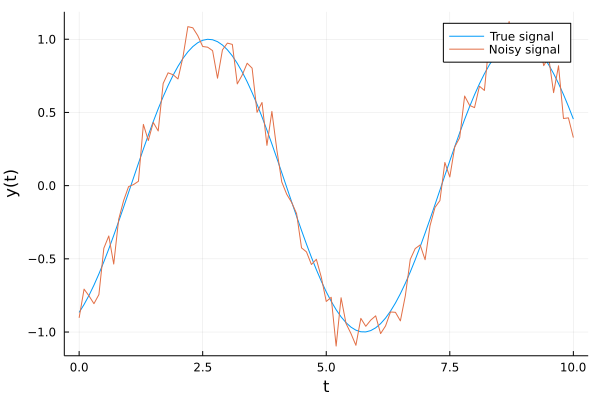

In [1]:
using Plots, Random
backend()
t = LinRange(0,10,101)
# make a noisy signal
f = sin.(t .- π/3);
y = f .+ 0.1 .* randn(length(t));
plot(t, f, xlabel="t", ylabel="f(t)", label="True signal")
plot!(t, y, xlabel="t", ylabel="y(t)", label="Noisy signal")

We will use $k = \begin{bmatrix} \frac{1}{3} & \frac{1}{3} & \frac{1}{3} \end{bmatrix}^{\text{T}}$ to compute $g(t) = k * y(t)$. Here $y(t)$ is the noise-corrupted signal ($n$-vector), $k$ is the filter (also called the convolution *kernel*), and $g(t)$ is the filtered signal.

The $(n + 2)$-vector $g = k ∗ y$ can be interpreted as a smoothed version of the original time series: for $i = 3,\dots, n$, $g_i$ is the average of $y_i, y_{i−1}, y_{i−2}$. The time series $g$ is called the (3-period) moving average of the time series $y$.

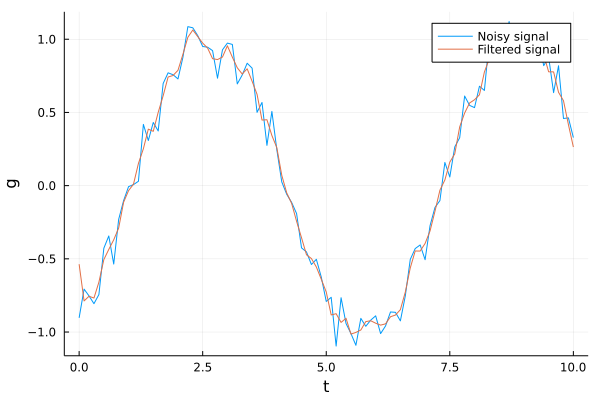

In [2]:
k = [1/3 1/3 1/3]; # conv kernel
T = zeros(length(f)+length(k)-1, length(f)); # construct Toeplitz matrix T(k)
n1,n2 = size(T);
for i = 1:n2
       T[i:min(n1,i+length(k)-1),i] = k;        
end
g = T * y; # compute the filtered signal via matrix-vector multiplication
plot(t, y, xlabel="t", ylabel="y(t)", label="Noisy signal")
plot!(t, g[2:n2+1], xlabel="t", ylabel="g", label="Filtered signal")

### 2-D convolution
Convolution has a natural extension to multiple dimensions. Suppose that $A$ is an $m \times n$ matrix and $B$ is a $p \times q$ matrix. Their convolution is the $(m+p-1)\times(n+q-1)$ matrix
$$ C_{rs} = \sum_{i+k=r+1} \sum_{j+l=s+1} A_{ij} B_{kl}, \quad r=1,\dots,m+p-1, \quad s=1,\dots,n+q-1, $$
where the indices are restricted to their ranges (or alternatively, we assume that $A_{ij}$ and $B_{kl}$ are zero, when the indices are out of range).

We will use the notation $C = A \star B$ to denote matrix convolution.

### Edge detection using Sobel kernel

In image processing and computer vision, 2D convolution is widely used for extracting *features* from an image. An image is just an array of numbers stored in a matrix. Each entry of the matrix corresponds to a pixel in the image. 

A particularly interesting problem is edge detection. Here we try a simple edge detection algorithm using Sobel kernels. The algorithm applies the following kernels and uses a Euclidean length to compute each pixel's magnitude in the image.
$$K_x = \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}, \quad K_y = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$ 

The convolution of these kernels with Image $I$ gives estimates of first-order image derivatives
$$I_x = K_x \star I, \quad I_y = K_y \star I.$$

Finally $E_{ij} = \sqrt{I_{x_{ij}}^2 + I_{y_{ij}}^2}$ gives edges in image $I$!

In [3]:
using Pkg; 
Pkg.add("TestImages")
Pkg.add("Colors")
Pkg.add("ImageIO")

    Updating registry at `C:\Users\manig\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Manifest.toml`


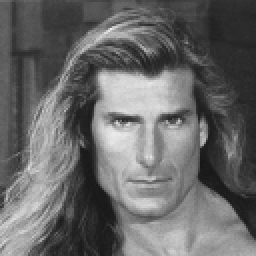

┌ Warning: Output swatches are reduced due to the large size (256×256).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\manig\.julia\packages\Colors\yDxFN\src\display.jl:159


In [4]:
using TestImages, Colors
I = Gray.(testimage("fabio_gray_256"))

In [5]:
function sobel_edge(img)
    img = convert(Array{Float64}, img);
    Kx = [-1. 0. 1.; -2. 0. 2.; -1. 0. 1.] # Sobel kernel along x-axis (flipped!)
    Ky = [-1. -2. -1.; 0. 0. 0.; 1. 2. 1.] # Sobel kernel along y-axis (flipped!)
    rows,columns = size(img) # get image size
    E = img .* 0; # initialize a matrix to store edges
    # some magic to compute the convolution Kx * I and Ky * I!
    for i=1:rows-2
        for j=1:columns-2
            Ix = sum(Kx .* img[i:i+2,j:j+2]);
            Iy = sum(Ky .* img[i:i+2,j:j+2]);
            E[i+1, j+1] = sqrt(Ix^2+Iy^2) > 100/255. ? sqrt(Ix^2+Iy^2) : 0; 
        end
    end
   return Gray.(E);
end

sobel_edge (generic function with 1 method)

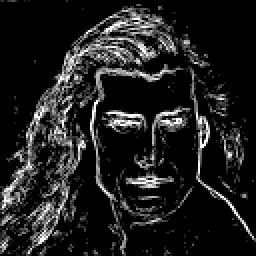

┌ Warning: Output swatches are reduced due to the large size (256×256).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\manig\.julia\packages\Colors\yDxFN\src\display.jl:159


In [6]:
E = sobel_edge(I)

In [7]:
Pkg.add("BenchmarkTools")

   Resolving package versions...
    Updating `C:\Users\manig\.julia\environments\v1.6\Project.toml`
  [6e4b80f9] + BenchmarkTools v1.2.1
  No Changes to `C:\Users\manig\.julia\environments\v1.6\Manifest.toml`


In [8]:
using BenchmarkTools

@benchmark sobel_edge(I)

BenchmarkTools.Trial: 103 samples with 1 evaluation.
 Range (min … max):  35.477 ms … 75.497 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     50.707 ms              ┊ GC (median):    9.35%
 Time  (mean ± σ):   48.827 ms ±  6.829 ms  ┊ GC (mean ± σ):  7.56% ± 4.45%

                          ▁█▁   ▁                              
  ▅▅▁▄▄▄▅▁▃▃▆▃▃▅▅▃▃▃▆▁▁▄█▅████▅██▄▁▁▃▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▃ ▃
  35.5 ms         Histogram: frequency by time        72.1 ms <

 Memory estimate: 40.88 MiB, allocs estimate: 258074.

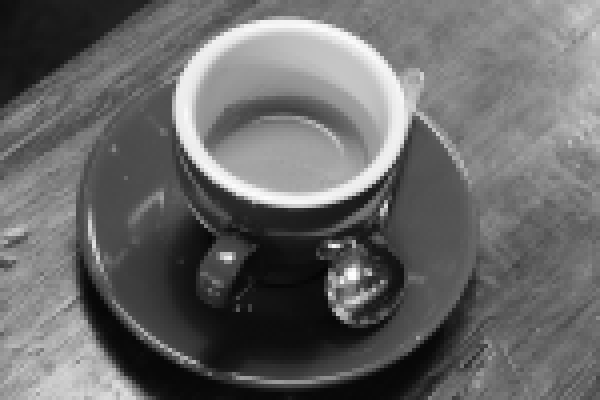

┌ Warning: Output swatches are reduced due to the large size (400×600).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\manig\.julia\packages\Colors\yDxFN\src\display.jl:159


In [9]:
I = Gray.(testimage("coffee"))

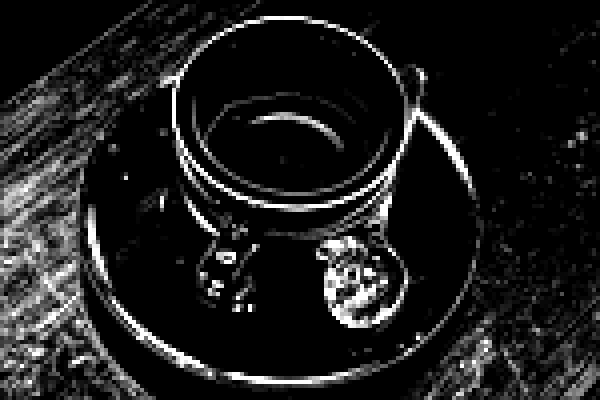

┌ Warning: Output swatches are reduced due to the large size (400×600).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\manig\.julia\packages\Colors\yDxFN\src\display.jl:159


In [10]:
E = sobel_edge(I)